In [2]:
import pymc3 as pm
import numpy as np

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
#generate fake data
np.random.seed(123)
n_samples = 100
X = np.random.randn(n_samples, 2)
β = np.array([2,-1])
p = 1/ (1 + np.exp(-X @ β))
y = np.random.binomial(1,p)


In [4]:
#Build the model

with pm.Model() as model:
    #define the prior for regression coeffs
    β = pm.Normal('β', mu=0, sigma = 10, shape=2)
    #define the likelihood
    p = pm.Deterministic("p", 1 / (1+ pm.math.exp(-X @ β)))
    y_obs = pm.Bernoulli("y_obs", p = p, observed =y)
    #perform MCMC sampling
    trace = pm.sample(2000, chains=2)

C:\Users\Mfund\AppData\Roaming\Python\Python38\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [β]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 15 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\AppData\Roaming\Python\Python38\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Mfund\AppData\Roaming\Python\Python38\site-packages\arviz\plots\plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (102) in plot_posterior, generating only 40 plots
  warnings.warn(


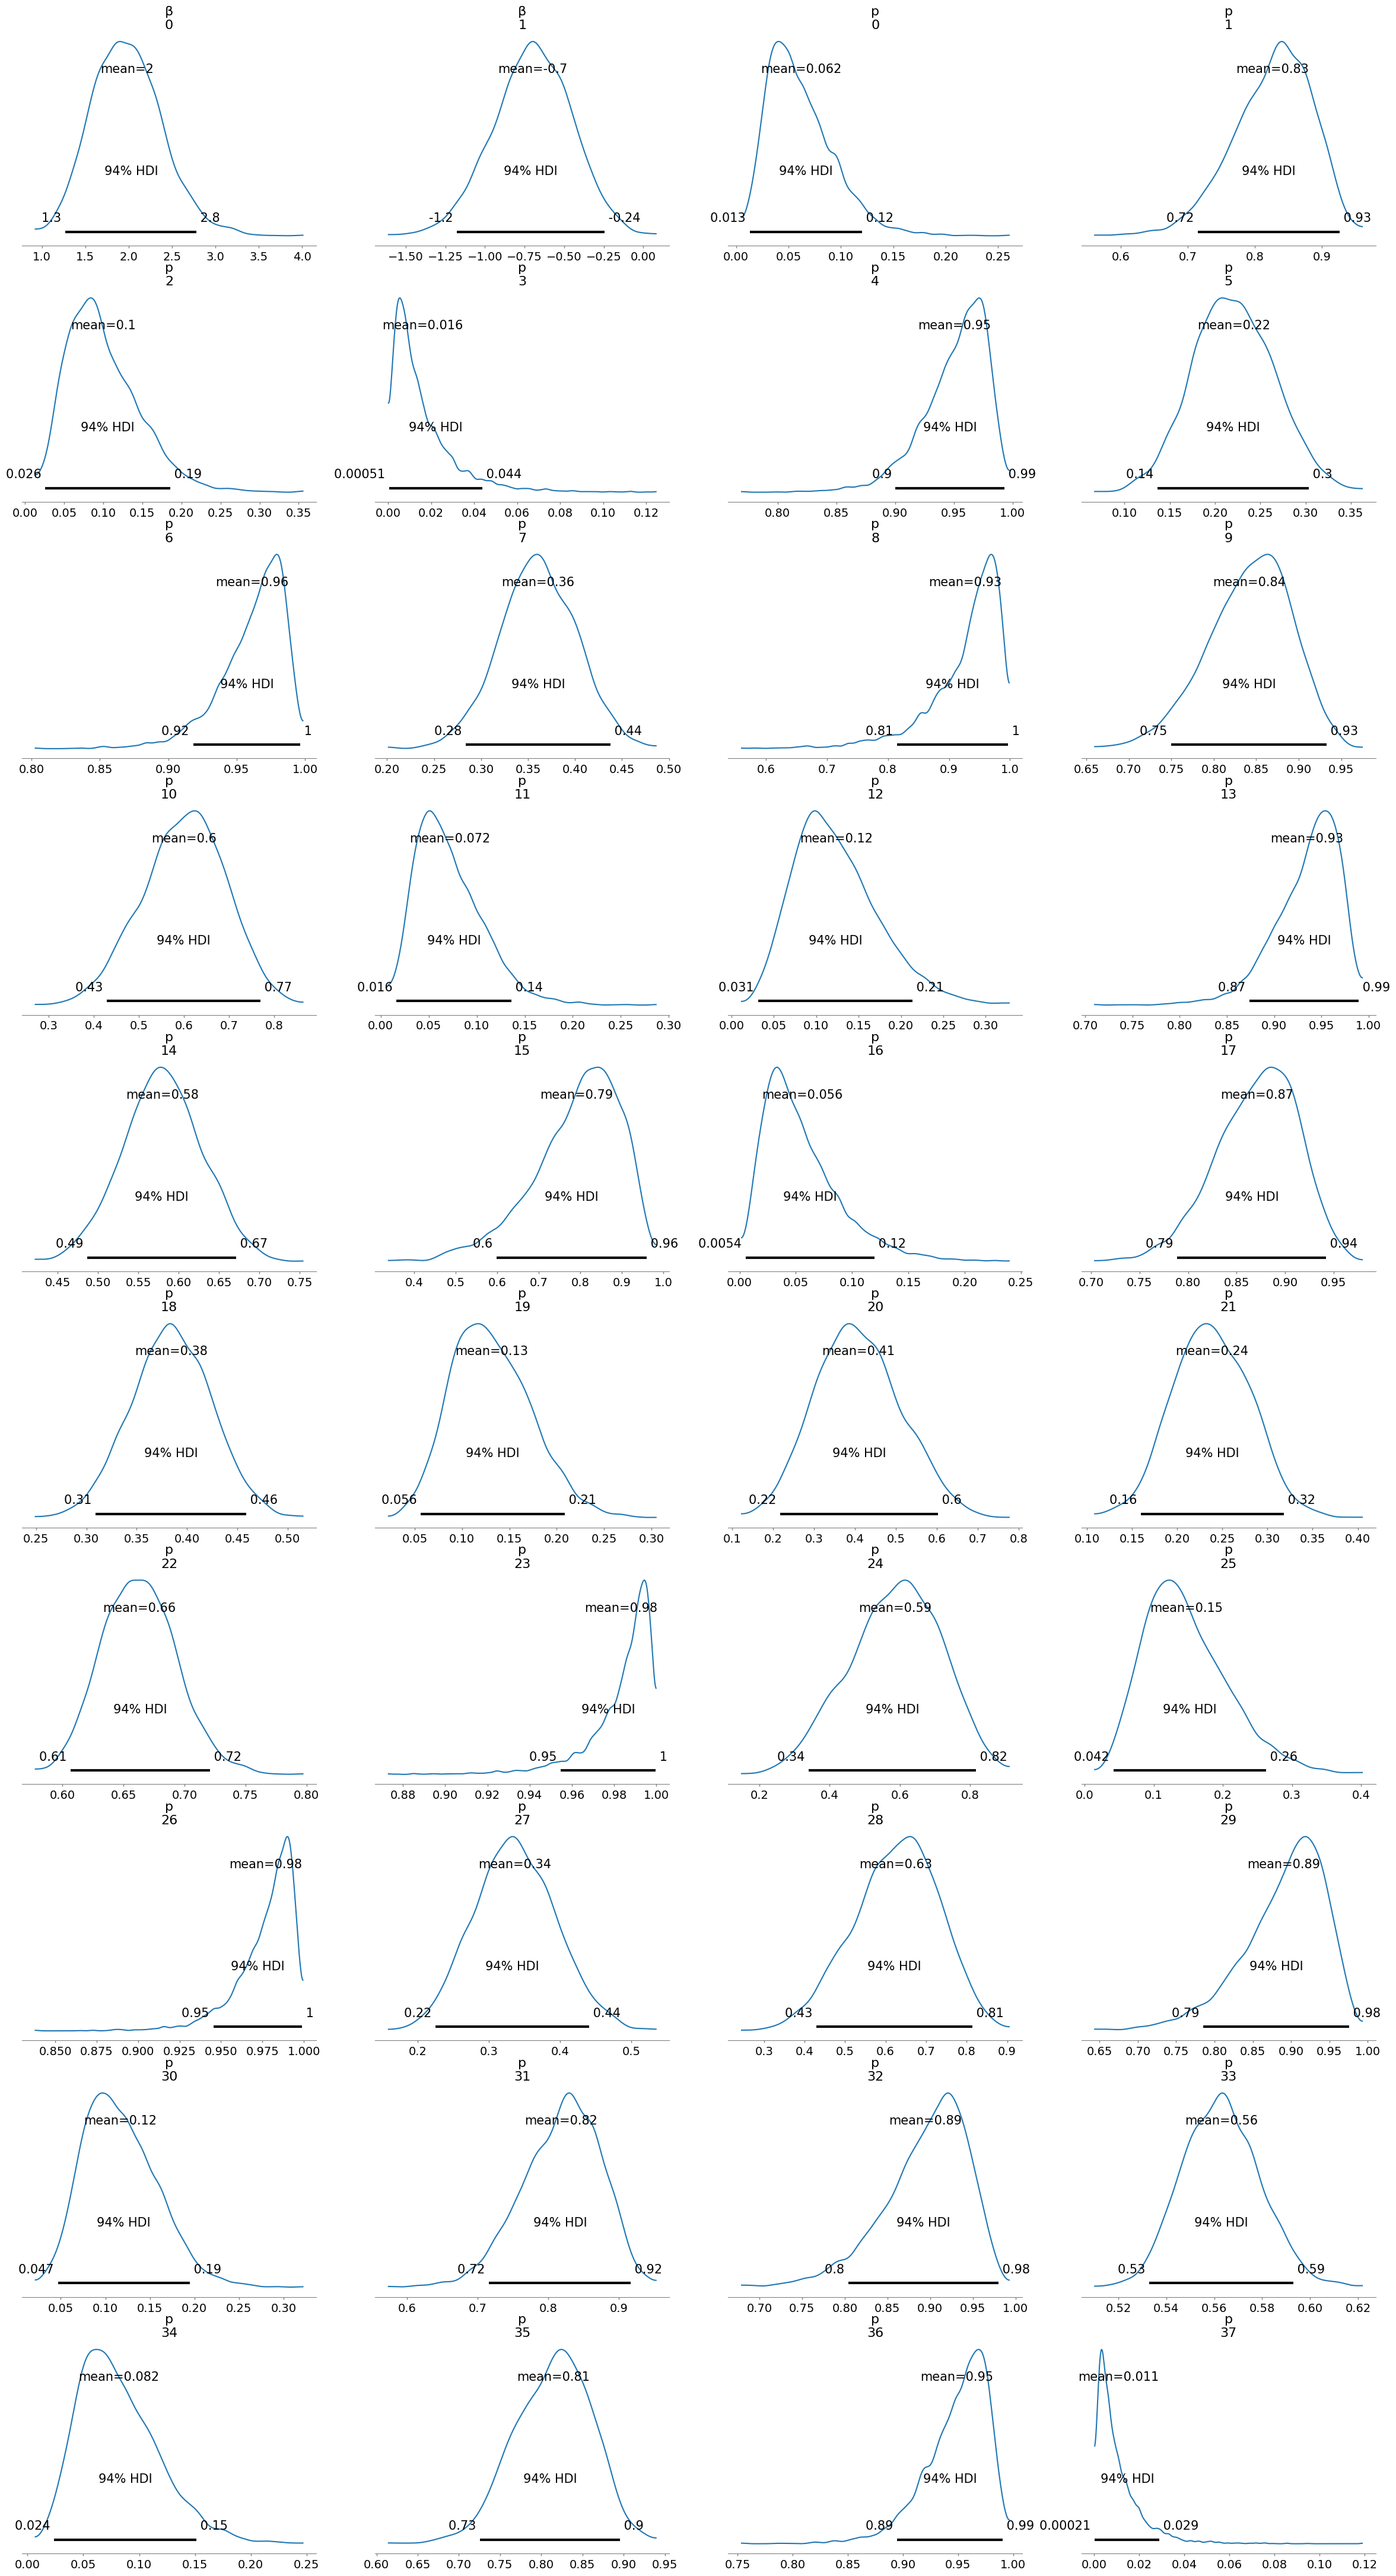

In [5]:
import arviz as az
az.plot_posterior(trace);

In [6]:
#make predictions with bnn
with model:
    ppc = pm.sample_posterior_predictive(trace,samples=1000,
                                        model=model, var_names=['y_obs'])

C:\Users\Mfund\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



A possible next model could be a Bayesian Generalized Linear Model (GLM) which is a statistical model that allows you to perform regression and classification tasks using a Bayesian framework. GLMs extend the linear regression model to cover a wide range of probability distributions for the response variable, such as binomial, Poisson, and exponential distributions.

ValueError: x and y must be the same size

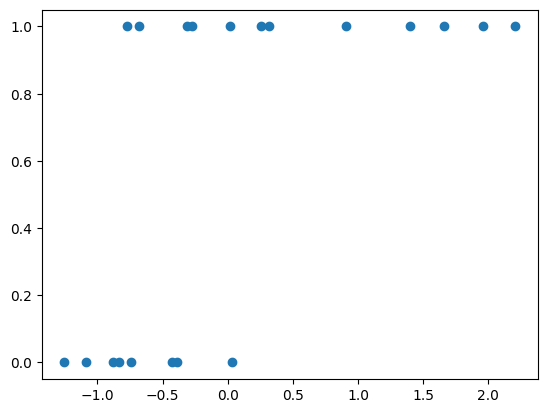

In [8]:
#plot the preds along with the uncertainty
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], y_test, label = 'True')
plt.scatter(X_test[:,0], ppc['y_obs'].mean(axis=0),
           label = 'predicted')
plt.fill_between(X_test[:,0], ppc['y_obs'].mean(axis=0))
plt.show()

In [10]:
%reload_ext watermark
%watermark -n -u -v -iv -w

Last updated: Thu Jan 19 2023

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.8.0

numpy     : 1.22.1
pymc3     : 3.11.5
arviz     : 0.14.0
matplotlib: 3.6.3

Watermark: 2.3.1

